In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.optimize import curve_fit

In [68]:
offset = 105.75757575757576   
escala  = 2.1969696969696972

th1 = 10  # threshold para las mediciones de 1 ms
th2 = 19  # threshold para las mediciones de 2 ms
th5 = 47  # threshold para las mediciones de 5 ms

In [69]:
def sep_data(data, th):
    '''
    Esta función deveulve una lista de tiempos, una con las probabilidades de doppler 
    otra con las probabilidades de banda laterear y los errores de estas dos, tomando a
    estos como el intervalo de confianza binario. las devuelve en este mismo orden es decir
    tiempo -- prob doppler -- prob sb -- std doppler -- std sb
    
    Esta función toma dos argumentos el archivo con toda la data y el threshold correspondiente
    al tiempo de medición de estas medidas.
    '''
    
    tiempo = data[:,0]
    
    #Verificar que este sea el orden de los archivos
    
    doppler = data[:, 2::2] #doppler
    bandalateral = data[:, 3::2] #sideband
    
    len_dop = np.shape(doppler)[1]
    len_sb  = np.shape(bandalateral)[1]
    
    dop = (doppler-offset)/escala
    sb = (bandalateral-offset)/escala

    dop_binario = np.where(dop >th, 1,0)
    sb_binario  = np.where(sb >th , 1, 0) 
    
    prob_dop = np.sum(dop_binario/len(dop_binario[0,:]), axis = 1)
    prob_sb  = np.sum(sb_binario/len(sb_binario[0,:]), axis = 1)

    std_dop = np.sqrt(prob_dop * (1-prob_dop)/len_dop)
    std_sb  = np.sqrt(prob_sb*(1-prob_sb)/len_sb)
    
    return tiempo, prob_dop, prob_sb, std_dop, std_sb

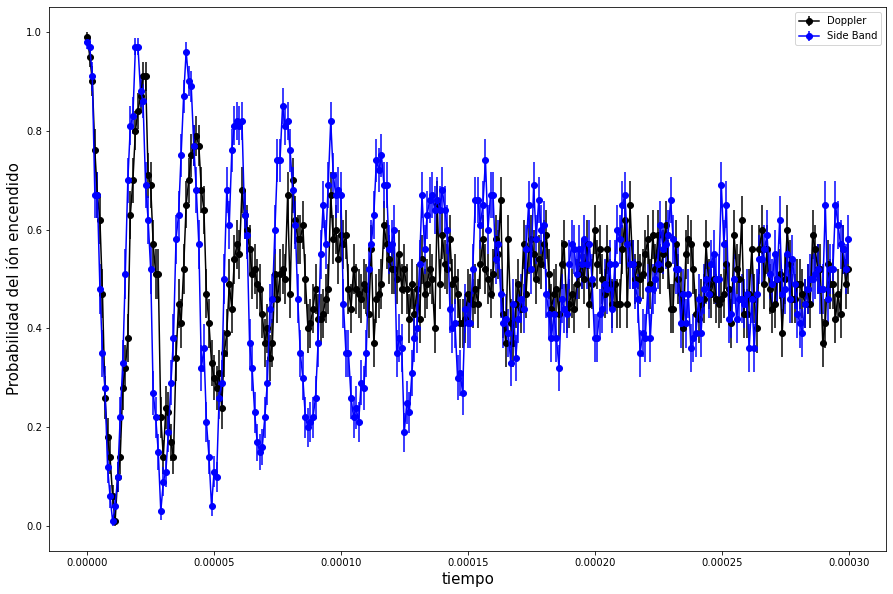

In [70]:
data = np.loadtxt("data/rawData/83/rawdataEMCCD.dat")

t, prob_dop, prob_sb, std_dop, std_db = sep_data(data, th2)

plt.figure(figsize=(15,10), facecolor = 'w')

plt.errorbar(t, prob_dop, fmt = 'o-k', yerr = std_dop, label = 'Doppler')
plt.errorbar(t, prob_sb, fmt = 'o-b', yerr = std_sb, label = 'Side Band')
plt.xlabel('tiempo', fontsize = 15)
plt.ylabel('Probabilidad del ión encendido', fontsize = 15)
plt.legend()